In [1]:
from glob import glob
from os.path import join, exists
from os.path import getsize

import numpy as np
import pandas as pd
import scipy

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.stats.multitest

# import nilearn.masking
import nilearn
from nilearn import plotting as niplt
from nilearn import image as niimg
# import nilearn.decoding

/home/sungbeenpark/anaconda3/envs/GA/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
model = 'vgg16'

In [3]:
dir_root = join('/home/sungbeenpark/activations')
dir_data = join(dir_root, model, 'pca/eval')

In [4]:
list_subj = []
for s in glob(join(dir_data, '*')):
    tmp = s.split('/')[-1]
    list_subj.append(tmp)
list_subj = np.array(sorted(list_subj))
list_subj

array(['01', '02', '05', '07', '08', '11', '12', '13', '14', '15', '18',
       '19', '20', '21', '23', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '42', '44'], dtype='<U2')

In [5]:
list_ = glob(join(dir_data, '08', '*'))
list_ = sorted(list_)
list_

['/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer01.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer02.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer03.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer04.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer05.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer06.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer07.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer08.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer09.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer10.GB08.nii',
 '/home/sungbeenpark/activations/vgg16/pca/eval/08/score.r01.fullmask.layer11.GB08.nii',
 '/home/sungbeenpark/

In [6]:
list_ = list_[13:26]

100%|██████████| 13/13 [00:17<00:00,  1.32s/it]


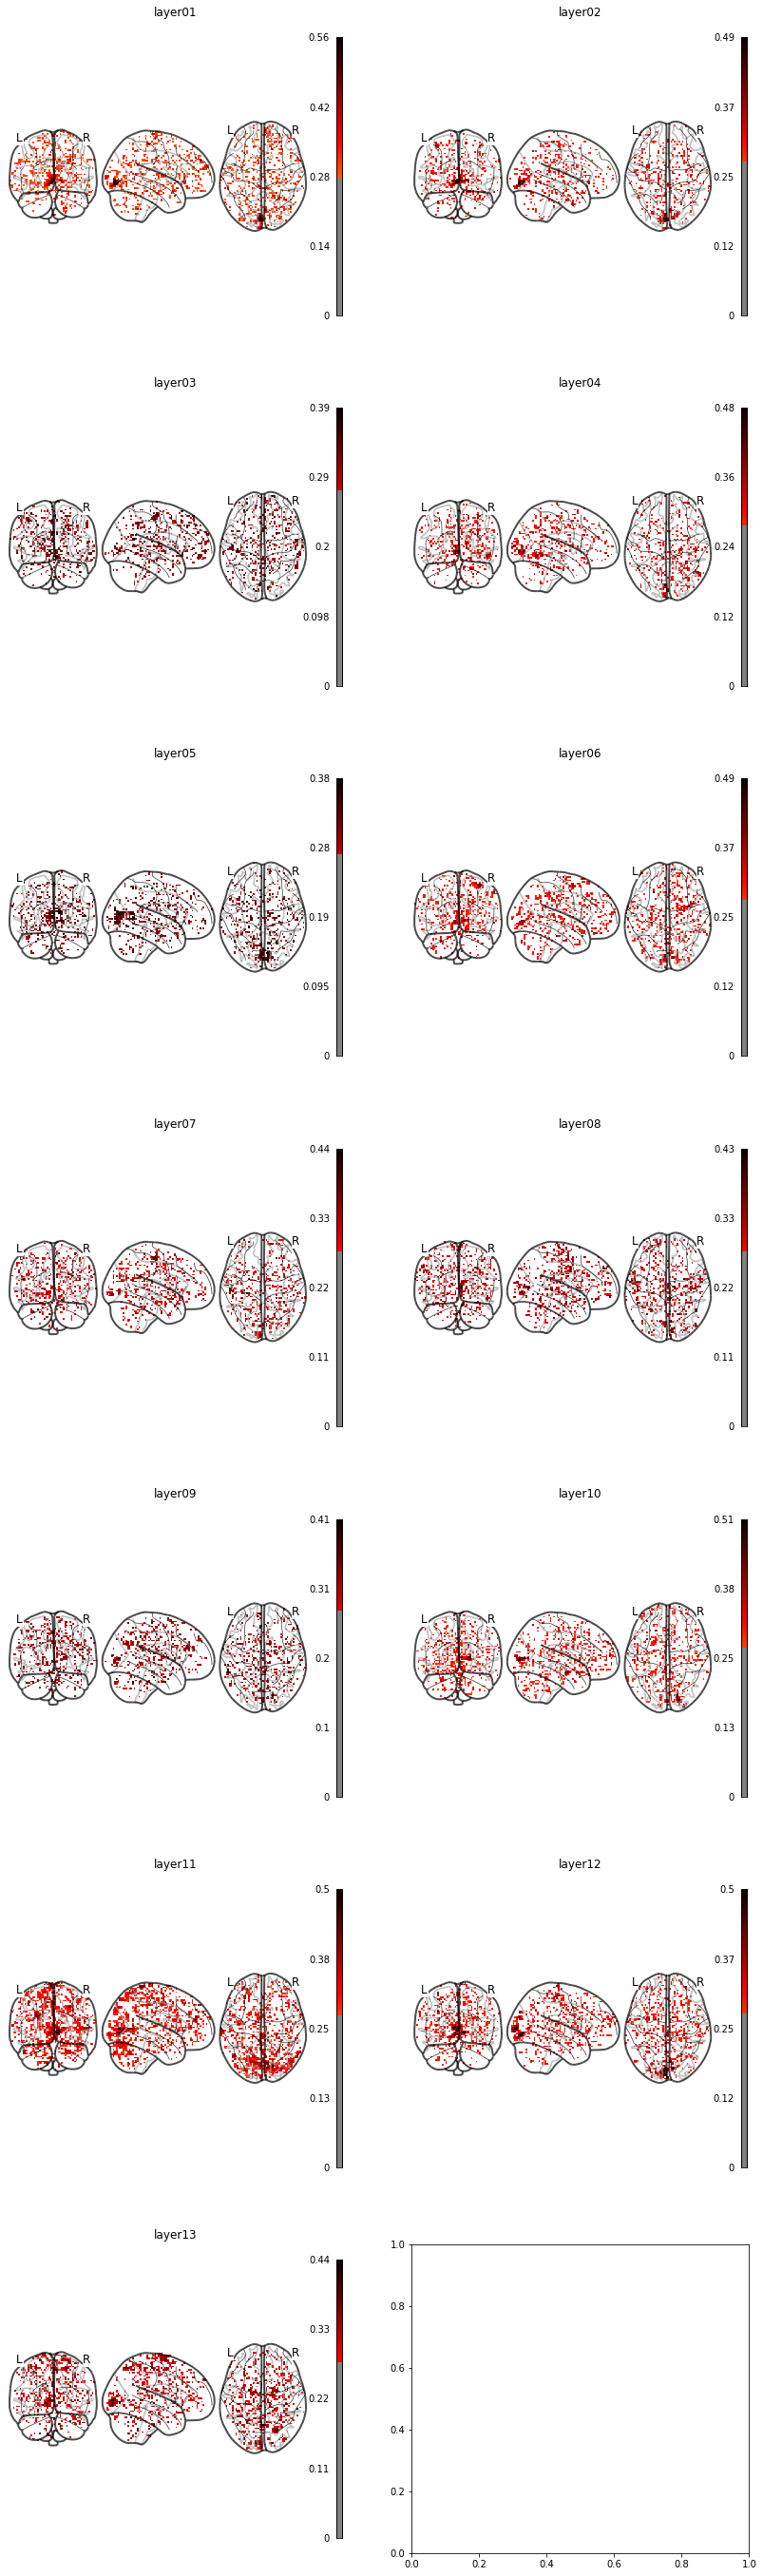

In [9]:
nrow = 7
ncol = 2
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(7*ncol, 7*nrow))
axs = np.concatenate(axs)

for i, f in enumerate(tqdm(list_)):
    ax = axs[i]
    niplt.plot_glass_brain(f, threshold=0.28, colorbar=True, axes=ax)
    layer = f.split('.')[-3]
    ax.set(title=layer)